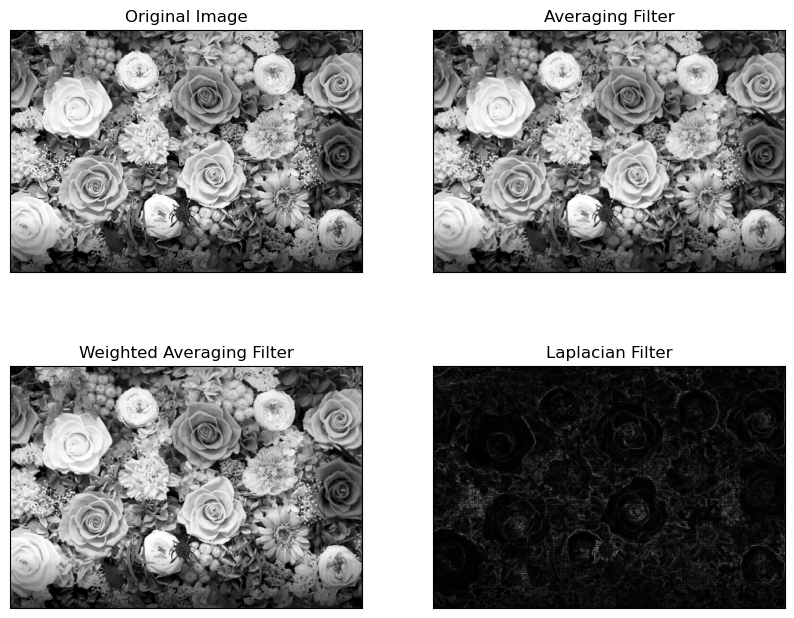

In [8]:
#Implementation of spatial filtering techniques
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2024-01-19 132923.png", cv2.IMREAD_GRAYSCALE)

# 1. Averaging Filter (Mean Filter)
kernel_avg = np.ones((3, 3), np.float32) / 9
avg_filtered_image = cv2.filter2D(image, -1, kernel_avg)

# 2. Weighted Averaging Filter (Gaussian-like)
kernel_weighted_avg = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]], np.float32) / 16
weighted_avg_filtered_image = cv2.filter2D(image, -1, kernel_weighted_avg)

# 3. Laplacian Filter
laplacian_filtered_image = cv2.Laplacian(image, cv2.CV_64F)
laplacian_filtered_image = np.uint8(np.absolute(laplacian_filtered_image))

# Display the results
titles = ['Original Image', 'Averaging Filter', 'Weighted Averaging Filter', 'Laplacian Filter']
images = [image, avg_filtered_image, weighted_avg_filtered_image, laplacian_filtered_image]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()





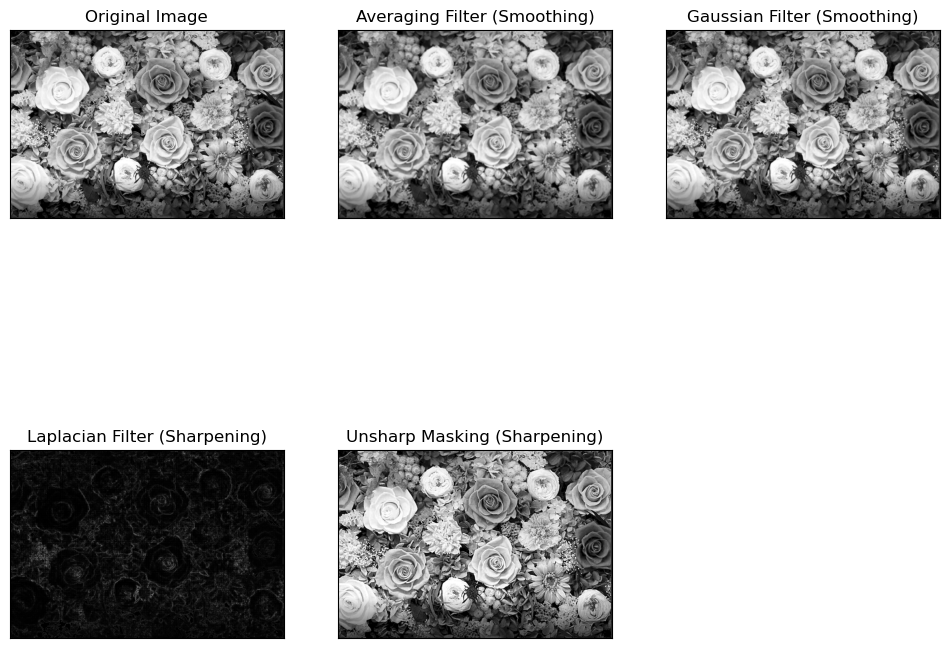

In [7]:
#Implementation of Smoothning and sharpning techniques using spatial filters 

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Lenovo\Pictures\Screenshots\Screenshot 2024-01-19 132923.png", cv2.IMREAD_GRAYSCALE)

# 1. Smoothing Techniques

# a) Averaging Filter (Mean Filter)
kernel_avg = np.ones((5, 5), np.float32) / 25  # 5x5 kernel for stronger smoothing
smoothed_image_avg = cv2.filter2D(image, -1, kernel_avg)

# b) Gaussian Filter (Weighted Averaging)
smoothed_image_gaussian = cv2.GaussianBlur(image, (5, 5), 0)

# 2. Sharpening Techniques

# a) Laplacian Filter
laplacian_filtered_image = cv2.Laplacian(image, cv2.CV_64F)
sharpened_image_laplacian = cv2.convertScaleAbs(laplacian_filtered_image)

# b) Unsharp Masking
# Step 1: Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (9, 9), 10.0)

# Step 2: Subtract the blurred image from the original image
unsharp_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

# Display the results
titles = ['Original Image', 'Averaging Filter (Smoothing)', 'Gaussian Filter (Smoothing)', 
          'Laplacian Filter (Sharpening)', 'Unsharp Masking (Sharpening)']
images = [image, smoothed_image_avg, smoothed_image_gaussian, sharpened_image_laplacian, unsharp_image]

plt.figure(figsize=(12, 10))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

    


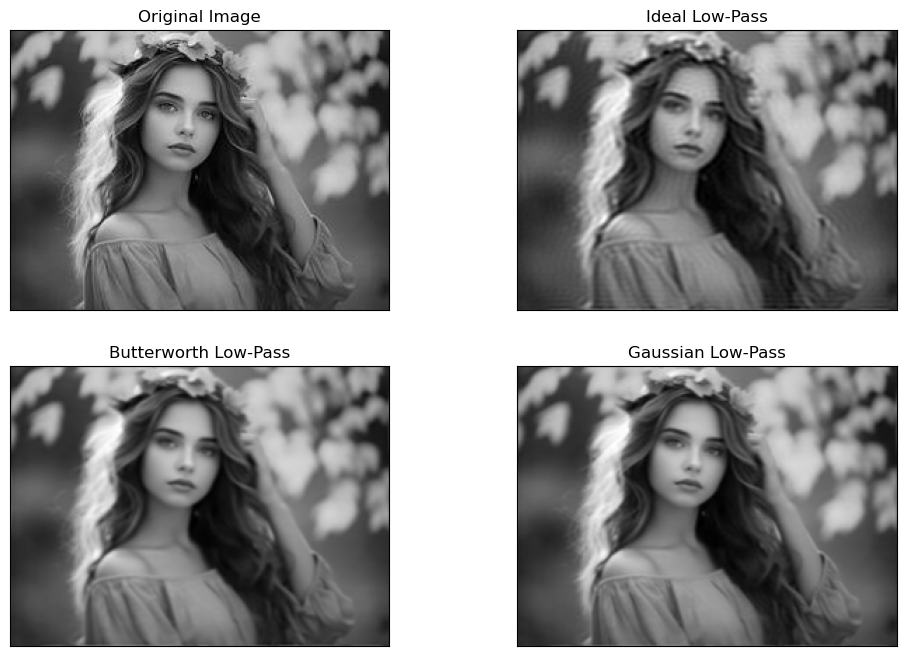

In [2]:
#Implementation of Image enhancement in Frequency domain in  low pass filter in all ideal ,butterworth,guassian
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Lenovo\Downloads\girl.jpg", cv2.IMREAD_GRAYSCALE)

# Perform DFT (Discrete Fourier Transform)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Get image dimensions
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2  # center

# Create low-pass filters
def ideal_low_pass_filter(shape, cutoff):
    mask = np.zeros(shape, np.uint8)
    r, c = shape[:2]
    center = (r // 2, c // 2)
    x, y = np.ogrid[:r, :c]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= cutoff**2
    mask[mask_area] = 1
    return mask

def butterworth_low_pass_filter(shape, cutoff, order):
    r, c = shape[:2]
    center = (r // 2, c // 2)
    x, y = np.ogrid[:r, :c]
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    mask = 1 / (1 + (distance / cutoff)**(2 * order))
    return mask

def gaussian_low_pass_filter(shape, cutoff):
    r, c = shape[:2]
    center = (r // 2, c // 2)
    x, y = np.ogrid[:r, :c]
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    mask = np.exp(-(distance**2) / (2 * (cutoff**2)))
    return mask

# Apply filters
cutoff = 50  # Adjust cutoff frequency as needed
ideal_filter = ideal_low_pass_filter(dft_shift.shape[:2], cutoff)
butterworth_filter = butterworth_low_pass_filter(dft_shift.shape[:2], cutoff, order=2)
gaussian_filter = gaussian_low_pass_filter(dft_shift.shape[:2], cutoff)

# Apply the mask and inverse DFT
def apply_filter_and_inverse_dft(dft_shift, filter_mask):
    # Apply filter mask
    filtered_dft = dft_shift * filter_mask[:,:,np.newaxis]
    
    # Inverse DFT
    f_ishift = np.fft.ifftshift(filtered_dft)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return img_back

# Get the filtered images
ideal_img = apply_filter_and_inverse_dft(dft_shift, ideal_filter)
butterworth_img = apply_filter_and_inverse_dft(dft_shift, butterworth_filter)
gaussian_img = apply_filter_and_inverse_dft(dft_shift, gaussian_filter)

# Display the results
titles = ['Original Image', 'Ideal Low-Pass', 'Butterworth Low-Pass', 'Gaussian Low-Pass']
images = [image, ideal_img, butterworth_img, gaussian_img]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16548\3895896381.py:32: RuntimeWarning: divide by zero encountered in divide
  mask = 1 / (1 + (cutoff / distance)**(2 * order))


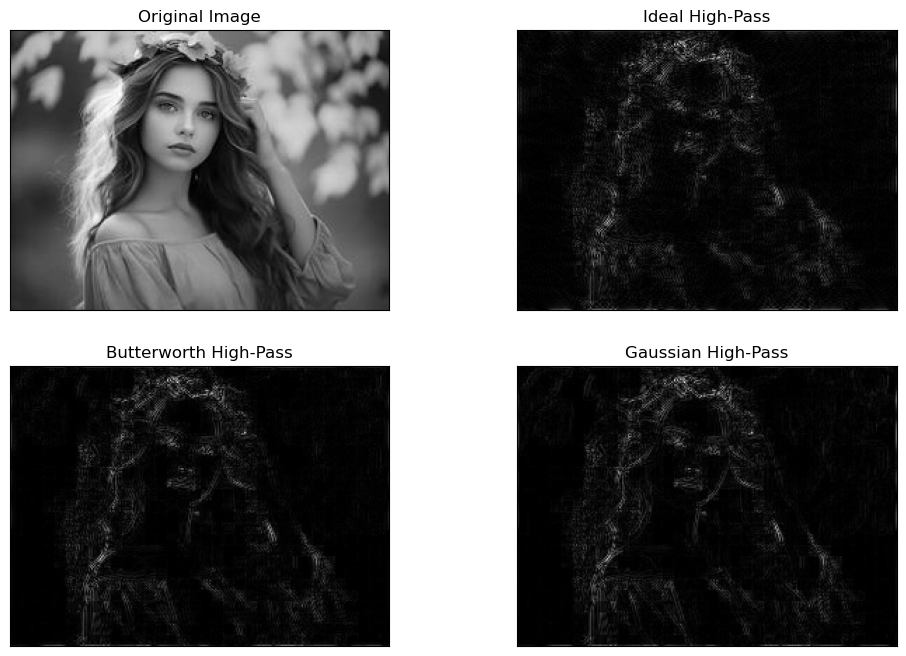

In [1]:
#Implementation of the image enhancement  in Frequency domain in High pass filter
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\Lenovo\Downloads\girl.jpg", cv2.IMREAD_GRAYSCALE)

# Perform DFT (Discrete Fourier Transform)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Get image dimensions
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2  # center

# Create high-pass filters
def ideal_high_pass_filter(shape, cutoff):
    mask = np.ones(shape, np.uint8)
    r, c = shape[:2]
    center = (r // 2, c // 2)
    x, y = np.ogrid[:r, :c]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= cutoff**2
    mask[mask_area] = 0
    return mask

def butterworth_high_pass_filter(shape, cutoff, order):
    r, c = shape[:2]
    center = (r // 2, c // 2)
    x, y = np.ogrid[:r, :c]
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    mask = 1 / (1 + (cutoff / distance)**(2 * order))
    mask[distance == 0] = 0  # Avoid division by zero
    return mask

def gaussian_high_pass_filter(shape, cutoff):
    r, c = shape[:2]
    center = (r // 2, c // 2)
    x, y = np.ogrid[:r, :c]
    distance = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    mask = 1 - np.exp(-(distance**2) / (2 * (cutoff**2)))
    return mask

# Apply filters
cutoff = 50  # Adjust cutoff frequency as needed
ideal_filter = ideal_high_pass_filter(dft_shift.shape[:2], cutoff)
butterworth_filter = butterworth_high_pass_filter(dft_shift.shape[:2], cutoff, order=2)
gaussian_filter = gaussian_high_pass_filter(dft_shift.shape[:2], cutoff)

# Apply the mask and inverse DFT
def apply_filter_and_inverse_dft(dft_shift, filter_mask):
    # Apply filter mask
    filtered_dft = dft_shift * filter_mask[:,:,np.newaxis]
    
    # Inverse DFT
    f_ishift = np.fft.ifftshift(filtered_dft)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    return img_back

# Get the filtered images
ideal_img = apply_filter_and_inverse_dft(dft_shift, ideal_filter)
butterworth_img = apply_filter_and_inverse_dft(dft_shift, butterworth_filter)
gaussian_img = apply_filter_and_inverse_dft(dft_shift, gaussian_filter)

# Display the results
titles = ['Original Image', 'Ideal High-Pass', 'Butterworth High-Pass', 'Gaussian High-Pass']
images = [image, ideal_img, butterworth_img, gaussian_img]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

